<a href="https://colab.research.google.com/github/BrandonOrtiz7/Metodos-numericos/blob/main/Interpolaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de Lagrange:
53.6893005545836*x**8 - 1.77635683940025e-15*x**7 - 102.815010562028*x**6 - 1.4210854715202e-14*x**5 + 61.3672060920176*x**4 + 8.88178419700125e-15*x**3 - 13.203034546112*x**2 + 2.22044604925031e-16*x + 1.0
Polinomio de Newton:
53.6893005545836*x**8 - 102.815010562028*x**6 + 61.3672060920175*x**4 + 3.5527136788005e-15*x**3 - 13.203034546112*x**2 + 1.0
Polinomio de Hermite:
2882.54099404041*x**16 - 10924.8303674132*x**14 + 16718.8458607217*x**12 - 13350.245219343*x**10 + 4.54747350886464e-12*x**9 + 6026.78632666864*x**8 + 2.04636307898909e-12*x**7 - 1566.86173494027*x**6 - 5.25801624462474e-13*x**5 + 232.235866047359*x**4 - 3.574918139293e-14*x**3 - 19.4332642431909*x**2 - 5.55111512312578e-16*x + 1.0


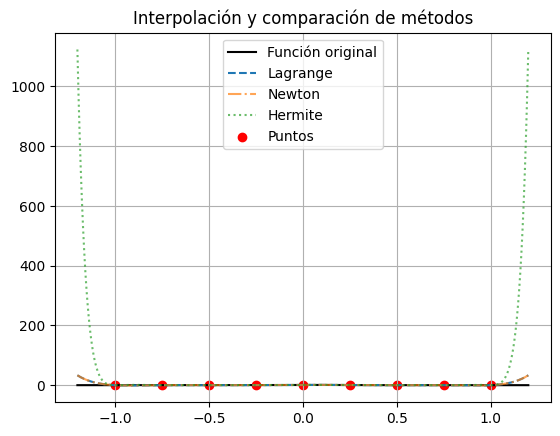

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Función dada
def f(x):
    return 1 / (1 + 25 * x**2)

# Puntos igualmente espaciados en el intervalo [-1, 1]
n = 9
x_vals = np.linspace(-1, 1, n)
y_vals = f(x_vals)
puntos = list(zip(x_vals, y_vals))

# --- Interpolación de Lagrange ---
def lagrange_interpolacion(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    P = 0

    for i in range(n):
        xi, yi = puntos[i]
        Li = 1
        for j in range(n):
            if i != j:
                xj = puntos[j][0]
                Li *= (x - xj) / (xi - xj)
        P += yi * Li

    P = sp.simplify(P)
    print("Polinomio de Lagrange:")
    print(P)
    return P

# --- Interpolación de Newton ---
def newton_interpolacion(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    coef = []
    tabla = [y for _, y in puntos]

    for j in range(n):
        coef.append(tabla[0])
        for i in range(n - j - 1):
            tabla[i] = (tabla[i + 1] - tabla[i]) / (puntos[i + j + 1][0] - puntos[i][0])

    P = coef[0]
    for j in range(1, n):
        term = coef[j]
        for i in range(j):
            term *= (x - puntos[i][0])
        P += term

    P = sp.simplify(P)
    print("Polinomio de Newton:")
    print(P)
    return P

# --- Interpolación de Hermite ---
def hermite_interpolacion(x, fx, dfx):
    n = len(x)
    Q = [[0.0 for _ in range(2 * n)] for _ in range(2 * n)]
    z = [0.0 for _ in range(2 * n)]

    for i in range(n):
        z[2 * i] = x[i]
        z[2 * i + 1] = x[i]
        Q[2 * i][0] = fx[i]
        Q[2 * i + 1][0] = fx[i]
        Q[2 * i + 1][1] = dfx[i]
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    for j in range(2, 2 * n):
        for i in range(j, 2 * n):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])

    x_sym = sp.Symbol('x')
    H = Q[0][0]
    for j in range(1, 2 * n):
        term = Q[j][j]
        for k in range(j):
            term *= (x_sym - z[k])
        H += term

    H = sp.simplify(H)
    print("Polinomio de Hermite:")
    print(H)
    return H

# --- Gráfica y comparación ---
def graficar(puntos, P_L, P_N, P_H):
    x = sp.Symbol('x')
    f_lagrange = sp.lambdify(x, P_L, modules=['numpy'])
    f_newton = sp.lambdify(x, P_N, modules=['numpy'])
    f_hermite = sp.lambdify(x, P_H, modules=['numpy'])

    x_vals = np.linspace(-1.2, 1.2, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="Función original", color="black")
    plt.plot(x_vals, f_lagrange(x_vals), label="Lagrange", linestyle="--")
    plt.plot(x_vals, f_newton(x_vals), label="Newton", linestyle="-.", alpha=0.7)
    plt.plot(x_vals, f_hermite(x_vals), label="Hermite", linestyle=":", alpha=0.7)

    plt.scatter(*zip(*puntos), color="red", label="Puntos")
    plt.legend()
    plt.grid()
    plt.title("Interpolación y comparación de métodos")
    plt.show()

# --- Cálculo de las interpolaciones y gráficas ---
P_L = lagrange_interpolacion(puntos)
P_N = newton_interpolacion(puntos)

dfx_vals = [sp.diff(f(sp.Symbol('x')), sp.Symbol('x')).evalf(subs={sp.Symbol('x'): x}) for x in x_vals]
P_H = hermite_interpolacion(x_vals, y_vals, dfx_vals)

graficar(puntos, P_L, P_N, P_H)
